# Przekształcenie Tf-Idf

Przekształcenie to mierzy jak ważne są poszczególne słowa w poszczególnych dokumentach.

Tf - term frequency - częstość słowa w dokumencie.

Idf - inverse document frequency - odwrotność częstości słowa w zbiorze dokumentów.

Wartość ważności słowa $w$ w dokumencie $d$ to:

$$TFIDF(w,d) = tf(w,d) \cdot idf(w).$$

Istnieje wiele różnych wariantów tej miary. Podstawowa to:

**tf(w,d)** - liczba wystąpień słowa $w$ w dokumencie $d$ podzielona przez liczbę wszystkich słów w dokumencie $d$;

**idf(w)** - logarytm z liczby dokumentów w korpusie podzielonej przez liczbę dokumentów, w których wystąpiło słowo $w$.

### https://en.wikipedia.org/wiki/Tf%E2%80%93idf


# Zad
Podzielmy zdania na słowa

In [7]:
from nltk.tokenize import sent_tokenize
EXAMPLE_TEXT = "Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard. I'm 20 years old."
sentences = sent_tokenize(EXAMPLE_TEXT)

print(sentences)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and Python is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard.", "I'm 20 years old."]


# Zad

Wykonajmy transformatę Tf-Idf

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
print( tfidf_vectorizer.vocabulary_ )
print("----")
print(tfidf_matrix.todense().shape)
print(tfidf_matrix.todense())

{'hello': 9, 'mr': 12, 'smith': 18, 'how': 10, 'are': 2, 'you': 23, 'doing': 6, 'today': 20, 'the': 19, 'weather': 21, 'is': 11, 'great': 8, 'and': 1, 'python': 15, 'awesome': 3, 'sky': 17, 'pinkish': 14, 'blue': 4, 'shouldn': 16, 'eat': 7, 'cardboard': 5, '20': 0, 'years': 22, 'old': 13}
----
(5, 24)
[[0.         0.         0.36152912 0.         0.         0.
  0.36152912 0.         0.         0.36152912 0.36152912 0.
  0.36152912 0.         0.         0.         0.         0.
  0.36152912 0.         0.36152912 0.         0.         0.29167942]
 [0.         0.3480587  0.         0.3480587  0.         0.
  0.         0.         0.3480587  0.         0.         0.56162314
  0.         0.         0.         0.3480587  0.         0.
  0.         0.28081157 0.         0.3480587  0.         0.        ]
 [0.         0.         0.         0.         0.48214012 0.
  0.         0.         0.         0.         0.         0.38898761
  0.         0.         0.48214012 0.         0.         0.4821

# Zad

Porównaj wynik Tf-Idf i reprezentacji bag-of-words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
cv_matrix = vectorizer.fit_transform(sentences)
print( vectorizer.vocabulary_ )
print("----")
print(cv_matrix.todense().shape)
print(cv_matrix.todense())

{'hello': 9, 'mr': 12, 'smith': 18, 'how': 10, 'are': 2, 'you': 23, 'doing': 6, 'today': 20, 'the': 19, 'weather': 21, 'is': 11, 'great': 8, 'and': 1, 'python': 15, 'awesome': 3, 'sky': 17, 'pinkish': 14, 'blue': 4, 'shouldn': 16, 'eat': 7, 'cardboard': 5, '20': 0, 'years': 22, 'old': 13}
----
(5, 24)
[[0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1]
 [0 1 0 1 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]]


# Zad 
Wypisz 5 najważniejszych sów w każdym, zdaniu względem Tf-Idf

In [10]:
import numpy as np
for i in range(len(sentences)):
    print(np.array(tfidf_vectorizer.get_feature_names())[
        tfidf_matrix.getrow(i).todense().argsort().A.flatten()[-5:][::-1]
    ])

['hello' 'today' 'are' 'smith' 'doing']
['is' 'weather' 'and' 'awesome' 'python']
['sky' 'blue' 'pinkish' 'is' 'the']
['cardboard' 'shouldn' 'eat' 'you' 'how']
['20' 'old' 'years' 'how' 'and']


#### Pytanie: do czego innego można zastosować TFIDF niż ważności słów w tekście?

# Zad
Porównaj wyniki z najczęstszymi słowami w kolejnych zdaniach

In [11]:
import numpy as np
for i in range(len(sentences)):
    print(np.array(vectorizer.get_feature_names())[
        cv_matrix.getrow(i).todense().argsort().A.flatten()[-5:][::-1]
    ])

['you' 'hello' 'today' 'are' 'smith']
['is' 'weather' 'and' 'the' 'awesome']
['is' 'the' 'sky' 'blue' 'pinkish']
['you' 'cardboard' 'shouldn' 'eat' 'how']
['20' 'old' 'years' 'how' 'and']


# Odległość między wektorami

* Znaczenia wyrazów w semantyce dystrybucyjnej są reprezentowane przez wektory liczbowe.

* Odległość między wektorami będziemy interpretować jako stopień podobieństwa reprezentowanych przez nie wyrazów.

* Najpopularniejszą miarą odległości dla reprezentacji wektorowej jest miara kosinusowa. 

* Wyrazy podobne, tzn. takie, które opisują ściśle związane ze sobą pojęcia, powinny odpowiadać wektorom leżącym blisko siebie, co oznacza, że kąt pomiędzy nimi powinien być jak najmniejszy, a co za tym idzie, kosinus tego kąta powinien być bliski 1.

* Wyrazy, które nie są ze sobą powiązane semantycznie powinny być reprezentowane przez wektory ortogonalne, a więc kosinus kąta pomiędzy nimi powinien być bliski 0.

# Różne odległości

In [12]:
import scipy.spatial.distance as dis

# euclidean

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.euclidean.html#scipy.spatial.distance.euclidean

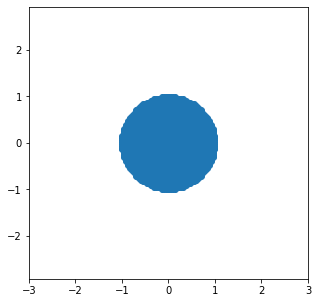

In [13]:
import matplotlib.pyplot as plt

data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.euclidean([0,0],[i,j]) < 1 ):
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# cityblock

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cityblock.html#scipy.spatial.distance.cityblock

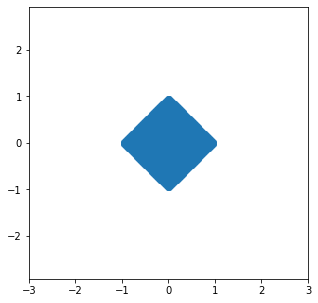

In [14]:
data = []
for i in np.linspace(-2.0, 2.0, num=100):
    for j in np.linspace(-2.0, 2.0, num=100):
        if( dis.cityblock([0,0],[i,j]) < 1 ): ########### zmien p = 1,2,3
            data.append( [i,j] )
data = np.array(data)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.axis("equal")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# cosine

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine

https://en.wikipedia.org/wiki/Cosine_similarity

Miarą, która wydaje się być lepiej dopasowana do naszego przypadku jest ***podobieństwo cosinusowe***. Definiujemy je następująco:

$$ sim(A, B) = \frac{A \cdot B}{\|A\| \|B\|} = \frac{\sum_{i=1}^{n}A_i B_i}{\sqrt{\sum_{i=1}^{n}A_i^2}\sqrt{\sum_{i=1}^{n}B_i^2}} $$

Oczywiście łatwo wyprowadzić wzór na odległość:

$$ dist(A, B) = 1 - sim(A, B) $$


Mierzy ona podobieństwo wektorów na podstawie rozkładu wartości elementów (proporcji), a nie wartości bewzględnych. Matematycznie: podobieństwo jest określane na podstawie kąta pomiędzy wektorami (wartości cosinusa tego kąta), a nie na podstawie długości wektorów.


https://en.wikipedia.org/wiki/Cosine_similarity

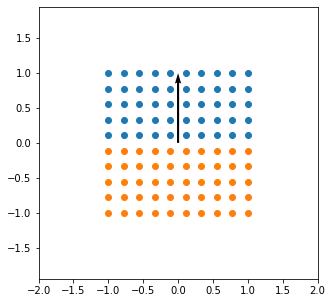

In [15]:
data = []
data1 = []
for i in np.linspace(-1., 1.0, num=10):
    for j in np.linspace(-1., 1.0, num=10):
        if( dis.cosine([0,1],[i,j]) < 1 ):
            data.append( [i,j] )
#         print(dis.cosine([0.1,0.1],[i,j]))
        else:
            data1.append( [i,j] )
#             print(1)
data = np.array(data)   
data1 = np.array(data1)   

plt.figure(figsize=(5,5));
plt.scatter(data[:,0], data[:,1])
plt.scatter(data1[:,0], data1[:,1])
V = np.array([[0,1]])
origin = [0], [0] # origin point

plt.quiver(*origin, V[:,0], V[:,1], angles='xy', scale_units='xy', scale=1)
plt.axis("equal")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

# Zad
Jednym z zadań NLP jest wyszukiwanie dokumentów podobnych dla danego zapytania (wyszukiwarki internetowe).

* Weźmy korpus dokumentów, jak poniżej. 

* Zadajemy zapytanie złorzone z "dies, dagger". 

* Prosze uszeregować dokumenty w kolejności od najbardziej pasujących. 

* Transformujemy query do naszej reprezentacji i liczymy odległość kosinusową (mnożenie wektorów i sumowanie)

Policz odległość między zdaniami: 
 * "I eat an apple."
 * "I ate the apple."

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize

sentences = ["I eat an apple.", "I eat an apple I eat an apple.", "I eat an apple apple apple."]


print(sentences)
vectorizer = CountVectorizer()
vectorizer.fit(sentences)
print( vectorizer.vocabulary_ )
bag_of_words = vectorizer.transform(sentences)
print(bag_of_words.todense())

['I eat an apple.', 'I eat an apple I eat an apple.', 'I eat an apple apple apple.']
{'eat': 2, 'an': 0, 'apple': 1}
[[1 1 1]
 [2 2 2]
 [1 3 1]]


In [17]:
import numpy as np

t1 = np.array(bag_of_words[0].todense()).flatten()
t2 = np.array(bag_of_words[1].todense()).flatten()
t3 = np.array(bag_of_words[2].todense()).flatten()
print(t1)
print(t2)
print(t3)


[1 1 1]
[2 2 2]
[1 3 1]


In [18]:
from scipy.spatial.distance import cosine
print(cosine(t1,t2))
print(cosine(t1,t3))
print("----")
print(dis.euclidean(t1,t2))
print(dis.euclidean(t1,t3))
print("----")
print(dis.cityblock(t1,t2))
print(dis.cityblock(t1,t3))

0.0
0.1296117202215108
----
1.7320508075688772
2.0
----
3
2


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
# print( tfidf_vectorizer.vocabulary_ )
# print("----")
# print(tfidf_matrix.todense())

t1 = np.array(tfidf_matrix[0].todense()).flatten()
t2 = np.array(tfidf_matrix[1].todense()).flatten()
t3 = np.array(tfidf_matrix[2].todense()).flatten()
print(t1)
print(t2)
print(t3)

print(cosine(t1,t2))
print(cosine(t1,t3))
print("----")
print(dis.euclidean(t1,t2))
print(dis.euclidean(t1,t3))
print("----")
print(dis.cityblock(t1,t2))
print(dis.cityblock(t1,t3))

[0.57735027 0.57735027 0.57735027]
[0.57735027 0.57735027 0.57735027]
[0.30151134 0.90453403 0.30151134]
0.0
0.1296117202215108
----
0.0
0.5091399026230626
----
0.0
0.8788616137673895


### Wniosek: Odległość cosinsusowa jest typową odległością na tekstach - ważny jest tylko kąt a nie długość.

# Zad
Znajdź najbliższe zdanie z korpusu do zestwu słów:

```python
query = ["dies", "dagger"]
```

In [20]:
corpus = ["Romeo and Juliet died",
         "Juliet: O happy dagger",
         "Romeo died by dagger",
         "'Live free or die', that’s the New-Hampshire’s motto",
         "Did you know, New-Hampshire is in New-England"]

In [15]:
query = ["dies", "dagger"]

Transformuje corpus

In [16]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


def my_tokenizer(sent):
    tokens = word_tokenize(sent)
    stemmer = PorterStemmer()
    res = [stemmer.stem(word) for word in tokens]
    return res 


vectorizer = TfidfVectorizer(tokenizer=my_tokenizer, stop_words=stopwords.words('english') + list(string.punctuation))
vectorizer.fit(corpus)
print(vectorizer.vocabulary_)
data = vectorizer.transform(corpus)
print(data.todense())


{'romeo': 10, 'juliet': 5, 'die': 2, 'happi': 4, 'dagger': 1, "'live": 0, 'free': 3, '’': 11, 'new-hampshir': 9, 'motto': 7, 'know': 6, 'new-england': 8}
[[0.         0.         0.50620441 0.         0.         0.60981846
  0.         0.         0.         0.         0.60981846 0.        ]
 [0.         0.53177225 0.         0.         0.659118   0.53177225
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.60981846 0.50620441 0.         0.         0.
  0.         0.         0.         0.         0.60981846 0.        ]
 [0.35137655 0.         0.23532097 0.35137655 0.         0.
  0.         0.35137655 0.         0.28348839 0.         0.70275311]
 [0.         0.         0.         0.         0.         0.
  0.61418897 0.         0.61418897 0.49552379 0.         0.        ]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Transformuje query

In [17]:
import numpy as np
query_data = vectorizer.transform(query)
print(query_data.todense())


[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Liczymy odległość kosinusową

In [18]:
res = np.dot(data, query_data.T).todense()
res

matrix([[0.50620441, 0.        ],
        [0.        , 0.53177225],
        [0.50620441, 0.60981846],
        [0.23532097, 0.        ],
        [0.        , 0.        ]])

### Wniosek: zapytanie "dies, dagger" najbardziej pasuje do "Romeo died by dagger"